# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** Muhamad Ibnu Khaidar Hafiz
- **Email:** m009d4ky3177@bangkit.academy
- **ID Dicoding:** M009D4KY3177

## Menentukan Pertanyaan Bisnis

1. Apa hubungan Polusi PM2.5 dan PM10 terhadap perbedaan Waktu
2. Apa ada peningkatan Suhu karena Ada peningkatan Polusi
3. Apa ada peningkatan dari Kandungan O3 atau Ozone?
4. Faktor apa lagi yang menyebabkan polusi udara?

## Import Semua Packages/Library yang Digunakan

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Download data menggunakan git clone karena sudah tersedia di github

In [74]:
!git clone https://github.com/marceloreis/HTI.git

fatal: destination path 'HTI' already exists and is not an empty directory.


### Assessing Data

In [75]:
aq_df = pd.read_csv("/content/HTI/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv", delimiter=",")

Melihat dataframe yang masih mentah

In [76]:
aq_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [77]:
aq_df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

menurut python dataset yang ada diatas menggunakan tipe data int64 dan float64 dan ada 18 kolom data

In [78]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


masih banyak data yang hilang

In [79]:
aq_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [80]:
aq_df.duplicated().sum()

0

tetapi tidak ada data yang ter duplikasi

### Cleaning Data

untuk cleaning pada dataset ini saya memilih untuk menggunakan metode interpolation

In [81]:
aq_df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Removing unused Columns

In [82]:
aq_df.drop(['No','CO','DEWP','wd','WSPM','station'], axis=1, inplace=True)
aq_df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,O3,TEMP,PRES,RAIN
0,2013,3,1,0,4.0,4.0,14.0,20.0,69.0,-0.7,1023.0,0.0
1,2013,3,1,1,4.0,4.0,13.0,17.0,72.0,-1.1,1023.2,0.0
2,2013,3,1,2,3.0,3.0,10.0,19.0,69.0,-1.1,1023.5,0.0
3,2013,3,1,3,3.0,6.0,7.0,24.0,62.0,-1.4,1024.5,0.0
4,2013,3,1,4,3.0,6.0,5.0,14.0,71.0,-2.0,1025.2,0.0


In [83]:
aq_df["PM2.5"].interpolate(method='linear', limit_direction='forward', inplace=True)
aq_df["PM10"].interpolate(method='linear', limit_direction='forward', inplace=True)
aq_df["SO2"].interpolate(method='linear', limit_direction='forward', inplace=True)
aq_df["NO2"].interpolate(method='linear', limit_direction='forward', inplace=True)
aq_df["O3"].interpolate(method='linear', limit_direction='forward', inplace=True)
aq_df["TEMP"].interpolate(method='linear', limit_direction='forward', inplace=True)
aq_df["PRES"].interpolate(method='linear', limit_direction='forward', inplace=True)
aq_df["RAIN"].interpolate(method='linear', limit_direction='forward', inplace=True)

In [84]:
aq_df.isnull().sum()

year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
O3       0
TEMP     0
PRES     0
RAIN     0
dtype: int64

sudah tidak ada data - data yang hilang

In [85]:
aq_df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,O3,TEMP,PRES,RAIN
0,2013,3,1,0,4.0,4.0,14.0,20.0,69.0,-0.7,1023.0,0.0
1,2013,3,1,1,4.0,4.0,13.0,17.0,72.0,-1.1,1023.2,0.0
2,2013,3,1,2,3.0,3.0,10.0,19.0,69.0,-1.1,1023.5,0.0
3,2013,3,1,3,3.0,6.0,7.0,24.0,62.0,-1.4,1024.5,0.0
4,2013,3,1,4,3.0,6.0,5.0,14.0,71.0,-2.0,1025.2,0.0


In [86]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    35064 non-null  int64  
 1   month   35064 non-null  int64  
 2   day     35064 non-null  int64  
 3   hour    35064 non-null  int64  
 4   PM2.5   35064 non-null  float64
 5   PM10    35064 non-null  float64
 6   SO2     35064 non-null  float64
 7   NO2     35064 non-null  float64
 8   O3      35064 non-null  float64
 9   TEMP    35064 non-null  float64
 10  PRES    35064 non-null  float64
 11  RAIN    35064 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 3.2 MB


In [87]:
aq_df['date'] = pd.to_datetime(aq_df[['year','month','day']])
aq_df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,O3,TEMP,PRES,RAIN,date
0,2013,3,1,0,4.0,4.0,14.0,20.0,69.0,-0.7,1023.0,0.0,2013-03-01
1,2013,3,1,1,4.0,4.0,13.0,17.0,72.0,-1.1,1023.2,0.0,2013-03-01
2,2013,3,1,2,3.0,3.0,10.0,19.0,69.0,-1.1,1023.5,0.0,2013-03-01
3,2013,3,1,3,3.0,6.0,7.0,24.0,62.0,-1.4,1024.5,0.0,2013-03-01
4,2013,3,1,4,3.0,6.0,5.0,14.0,71.0,-2.0,1025.2,0.0,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,13.0,37.0,3.0,36.0,60.0,12.5,1013.5,0.0,2017-02-28
35060,2017,2,28,20,20.0,43.0,4.0,48.0,43.0,11.6,1013.6,0.0,2017-02-28
35061,2017,2,28,21,16.0,33.0,5.0,39.0,50.0,10.8,1014.2,0.0,2017-02-28
35062,2017,2,28,22,11.0,24.0,5.0,47.0,41.0,10.5,1014.4,0.0,2017-02-28


In [88]:
new_cols = ['date','year','month','day','hour','PM2.5','PM10','SO2','NO2','O3','TEMP','PRES','RAIN']
aq_df = aq_df.reindex(columns=new_cols)

In [89]:
aq_df

,date,year,month,day,hour,PM2.5,PM10,SO2,NO2,O3,TEMP,PRES,RAIN
0,2013-03-01,2013,3,1,0,4.0,4.0,14.0,20.0,69.0,-0.7,1023.0,0.0
1,2013-03-01,2013,3,1,1,4.0,4.0,13.0,17.0,72.0,-1.1,1023.2,0.0
2,2013-03-01,2013,3,1,2,3.0,3.0,10.0,19.0,69.0,-1.1,1023.5,0.0
3,2013-03-01,2013,3,1,3,3.0,6.0,7.0,24.0,62.0,-1.4,1024.5,0.0
4,2013-03-01,2013,3,1,4,3.0,6.0,5.0,14.0,71.0,-2.0,1025.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017-02-28,2017,2,28,19,13.0,37.0,3.0,36.0,60.0,12.5,1013.5,0.0
35060,2017-02-28,2017,2,28,20,20.0,43.0,4.0,48.0,43.0,11.6,1013.6,0.0
35061,2017-02-28,2017,2,28,21,16.0,33.0,5.0,39.0,50.0,10.8,1014.2,0.0
35062,2017-02-28,2017,2,28,22,11.0,24.0,5.0,47.0,41.0,10.5,1014.4,0.0


Rename Column

In [90]:
rename = {'TEMP':'Temprature',
          'PRES':'Pressure'}

In [91]:
aq_df.rename(columns=rename, inplace=True)

In [92]:
aq_df.head()

,date,year,month,day,hour,PM2.5,PM10,SO2,NO2,O3,Temprature,Pressure,RAIN
0,2013-03-01,2013,3,1,0,4.0,4.0,14.0,20.0,69.0,-0.7,1023.0,0.0
1,2013-03-01,2013,3,1,1,4.0,4.0,13.0,17.0,72.0,-1.1,1023.2,0.0
2,2013-03-01,2013,3,1,2,3.0,3.0,10.0,19.0,69.0,-1.1,1023.5,0.0
3,2013-03-01,2013,3,1,3,3.0,6.0,7.0,24.0,62.0,-1.4,1024.5,0.0
4,2013-03-01,2013,3,1,4,3.0,6.0,5.0,14.0,71.0,-2.0,1025.2,0.0


In [93]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        35064 non-null  datetime64[ns]
 1   year        35064 non-null  int64         
 2   month       35064 non-null  int64         
 3   day         35064 non-null  int64         
 4   hour        35064 non-null  int64         
 5   PM2.5       35064 non-null  float64       
 6   PM10        35064 non-null  float64       
 7   SO2         35064 non-null  float64       
 8   NO2         35064 non-null  float64       
 9   O3          35064 non-null  float64       
 10  Temprature  35064 non-null  float64       
 11  Pressure    35064 non-null  float64       
 12  RAIN        35064 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(4)
memory usage: 3.5 MB


Change data types

In [94]:
pengganti = [{'day' : {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}}]

In [95]:
for values in pengganti :
    aq_df.replace(values, inplace=True)

In [96]:
aq_df.head()

,date,year,month,day,hour,PM2.5,PM10,SO2,NO2,O3,Temprature,Pressure,RAIN
0,2013-03-01,2013,3,Monday,0,4.0,4.0,14.0,20.0,69.0,-0.7,1023.0,0.0
1,2013-03-01,2013,3,Monday,1,4.0,4.0,13.0,17.0,72.0,-1.1,1023.2,0.0
2,2013-03-01,2013,3,Monday,2,3.0,3.0,10.0,19.0,69.0,-1.1,1023.5,0.0
3,2013-03-01,2013,3,Monday,3,3.0,6.0,7.0,24.0,62.0,-1.4,1024.5,0.0
4,2013-03-01,2013,3,Monday,4,3.0,6.0,5.0,14.0,71.0,-2.0,1025.2,0.0


In [97]:
bulan = [{'month' : {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}}]

In [98]:
for nilai in bulan:
    aq_df.replace(nilai, inplace=True)

In [99]:
aq_df.head()

,date,year,month,day,hour,PM2.5,PM10,SO2,NO2,O3,Temprature,Pressure,RAIN
0,2013-03-01,2013,March,Monday,0,4.0,4.0,14.0,20.0,69.0,-0.7,1023.0,0.0
1,2013-03-01,2013,March,Monday,1,4.0,4.0,13.0,17.0,72.0,-1.1,1023.2,0.0
2,2013-03-01,2013,March,Monday,2,3.0,3.0,10.0,19.0,69.0,-1.1,1023.5,0.0
3,2013-03-01,2013,March,Monday,3,3.0,6.0,7.0,24.0,62.0,-1.4,1024.5,0.0
4,2013-03-01,2013,March,Monday,4,3.0,6.0,5.0,14.0,71.0,-2.0,1025.2,0.0


In [100]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        35064 non-null  datetime64[ns]
 1   year        35064 non-null  int64         
 2   month       35064 non-null  object        
 3   day         35064 non-null  object        
 4   hour        35064 non-null  int64         
 5   PM2.5       35064 non-null  float64       
 6   PM10        35064 non-null  float64       
 7   SO2         35064 non-null  float64       
 8   NO2         35064 non-null  float64       
 9   O3          35064 non-null  float64       
 10  Temprature  35064 non-null  float64       
 11  Pressure    35064 non-null  float64       
 12  RAIN        35064 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(2), object(2)
memory usage: 3.5+ MB


In [101]:
hari = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
for col in aq_df.columns:
    if aq_df[col].dtype == 'day':
        aq_df[col] = aq_df[col].astype('category')

aq_df['day'] = pd.Categorical(aq_df['day'], categories=hari, ordered=True)

In [102]:
month = ['January','February','March','April','May','June','July','August','September','October','November','December']
for col in aq_df.columns:
    if aq_df[col].dtype == 'month':
        aq_df[col] = aq_df[col].astype('category')

aq_df['month'] = pd.Categorical(aq_df['month'], categories=month, ordered=True)

In [103]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        35064 non-null  datetime64[ns]
 1   year        35064 non-null  int64         
 2   month       35064 non-null  category      
 3   day         8064 non-null   category      
 4   hour        35064 non-null  int64         
 5   PM2.5       35064 non-null  float64       
 6   PM10        35064 non-null  float64       
 7   SO2         35064 non-null  float64       
 8   NO2         35064 non-null  float64       
 9   O3          35064 non-null  float64       
 10  Temprature  35064 non-null  float64       
 11  Pressure    35064 non-null  float64       
 12  RAIN        35064 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(8), int64(2)
memory usage: 3.0 MB


In [104]:
aq_df.describe()

,year,hour,PM2.5,PM10,SO2,NO2,O3,Temprature,Pressure,RAIN
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,2014.662560,11.500000,82.897522,109.372349,17.609312,58.139298,54.817142,13.581414,1011.851650,0.067383
std,1.177213,6.922285,81.070279,92.340966,23.631529,35.210206,57.199174,11.400426,10.404517,0.909798
min,2013.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.214200,-16.800000,985.900000,0.000000
25%,2014.000000,5.750000,23.000000,40.000000,3.000000,31.000000,6.000000,3.100000,1003.300000,0.000000
50%,2015.000000,11.500000,59.000000,89.000000,8.000000,51.000000,40.000000,14.500000,1011.400000,0.000000
75%,2016.000000,17.250000,114.000000,149.000000,22.000000,78.270244,80.000000,23.300000,1020.100000,0.000000
max,2017.000000,23.000000,680.000000,999.000000,293.000000,270.000000,415.000000,40.500000,1042.000000,72.500000


## Exploratory Data Analysis (EDA)

Explore Temprature difference by hour

In [105]:
temps_by_hour = aq_df.groupby("hour", as_index=False).agg({"Temprature":"mean"})
temps_by_hour

,hour,Temprature
0,0,11.379299
1,1,10.906431
2,2,10.445252
3,3,10.049188
4,4,9.730740
5,5,9.468758
6,6,9.617410
7,7,10.540993
8,8,11.957466
9,9,13.555042


Average Temprature by Month

In [106]:
temps_by_month = aq_df.groupby('month', as_index=False, observed=False).agg({'Temprature':'mean'})
temps_by_month

,month,Temprature
0,January,-1.634114
1,February,1.299502
2,March,8.403951
3,April,15.309271
4,May,21.419657
5,June,24.561424
6,July,27.195262
7,August,26.715121
8,September,20.916237
9,October,13.510233


Average Temprature by Year

In [107]:
temps_by_year = aq_df.groupby('year', as_index=False, observed=False).agg({'Temprature':'mean'})
temps_by_year

,year,Temprature
0,2013,15.497740
1,2014,13.878128
2,2015,13.474687
3,2016,13.871962
4,2017,0.664779


Average Pollution by Hours counted by PM2.5 and PM10

In [108]:
pollutions_by_hours = aq_df.groupby('hour', as_index=False).agg({'PM2.5':'mean','PM10':'mean'})
pollutions_by_hours

,hour,PM2.5,PM10
0,0,91.172971,120.974064
1,1,90.678275,117.926601
2,2,88.271670,113.812197
3,3,86.556281,109.091701
4,4,84.146026,105.030731
5,5,81.074775,101.648161
6,6,79.291204,100.746198
7,7,78.329512,101.954343
8,8,78.298006,104.409304
9,9,78.977297,105.361134


Average pollutions per day counted by PM 2.5 and PM 10 Levels

In [109]:
pollutions_per_day = aq_df.groupby('day', as_index=False).agg({'PM2.5':'mean','PM10':'mean'})
pollutions_per_day

,day,PM2.5,PM10
0,Monday,91.174653,114.688542
1,Tuesday,76.298438,95.165712
2,Wednesday,84.994444,113.748698
3,Thursday,90.901823,117.857205
4,Friday,78.587066,104.873958
5,Saturday,88.727431,110.211534
6,Sunday,87.128472,105.892198


Pollutions per Month

In [110]:
pollutions_per_month = aq_df.groupby('month', as_index=False).agg({'PM2.5':'mean','PM10':'mean'})
pollutions_per_month

,month,PM2.5,PM10
0,January,94.795430,115.919993
1,February,88.547935,103.987279
2,March,94.434207,136.345144
3,April,73.790278,120.254167
4,May,63.888710,119.817910
5,June,73.804861,92.194097
6,July,74.845598,89.501008
7,August,58.456015,76.122782
8,September,65.212569,83.192083
9,October,97.099630,118.439180


Pollutions Per year

In [111]:
pollutions_per_year = aq_df.groupby('year', as_index=False).agg({'PM2.5':'mean','PM10':'mean'})
pollutions_per_year

,year,PM2.5,PM10
0,2013,81.651893,108.949074
1,2014,88.527374,116.123402
2,2015,82.130183,106.321067
3,2016,77.132514,104.927026
4,2017,95.038842,116.255297


In [112]:
sulfurcontent_per_day = aq_df.groupby('day', as_index=False).agg({'SO2':'mean'})
sulfurcontent_per_day

,day,SO2
0,Monday,15.413066
1,Tuesday,18.104601
2,Wednesday,18.828993
3,Thursday,17.338976
4,Friday,16.621528
5,Saturday,19.771701
6,Sunday,18.216797


In [113]:
sulfurcontent_per_month = aq_df.groupby('month', as_index=False).agg({'SO2':'mean'})
sulfurcontent_per_month

,month,SO2
0,January,34.800857
1,February,32.003134
2,March,31.335263
3,April,15.474820
4,May,15.720158
5,June,8.486284
6,July,7.029402
7,August,4.973483
8,September,6.633911
9,October,8.832269


In [114]:
sulfurcontent_per_year = aq_df.groupby('year', as_index=False).agg({'SO2':'mean'})
sulfurcontent_per_year

,year,SO2
0,2013,21.859392
1,2014,23.133562
2,2015,14.073579
3,2016,11.484517
4,2017,21.259181


In [115]:
month_weather_temp = aq_df.groupby('month', as_index=False).agg({'Temprature':'mean', 'Pressure':'mean'})
month_weather_temp

,month,Temprature,Pressure
0,January,-1.634114,1023.257275
1,February,1.299502,1021.383346
2,March,8.403951,1014.972116
3,April,15.309271,1009.360347
4,May,21.419657,1003.427655
5,June,24.561424,1000.316250
6,July,27.195262,999.078730
7,August,26.715121,1002.197077
8,September,20.916237,1009.669410
9,October,13.510233,1015.940409


Yearly temprature and air pressure

In [116]:
year_weather_temp = aq_df.groupby('year', as_index=False).agg({'Temprature':'mean','Pressure':'mean'})
year_weather_temp

,year,Temprature,Pressure
0,2013,15.497740,1008.200408
1,2014,13.878128,1011.318082
2,2015,13.474687,1012.571857
3,2016,13.871962,1012.822320
4,2017,0.664779,1023.612524


Pressure and raining table

In [117]:
possibility_of_rain = aq_df.groupby('RAIN', as_index=False).agg({'Pressure':'mean'})
possibility_of_rain

,RAIN,Pressure
0,0.0,1012.025633
1,0.1,1008.157325
2,0.2,1008.937888
3,0.3,1010.621028
4,0.4,1010.636111
...,...,...
122,33.7,995.800000
123,36.6,1010.500000
124,40.7,997.600000
125,46.4,1008.300000


correlation between numerical variables

In [118]:
aq_df[['PM2.5','PM10','SO2','NO2','O3','Temprature','Pressure','RAIN']].corr()

,PM2.5,PM10,SO2,NO2,O3,Temprature,Pressure,RAIN
PM2.5,1.000000,0.886022,0.494901,0.688364,-0.147852,-0.132063,-0.000325,-0.010613
PM10,0.886022,1.000000,0.465970,0.649267,-0.107093,-0.089934,-0.050269,-0.025489
SO2,0.494901,0.465970,1.000000,0.521432,-0.187212,-0.360216,0.211667,-0.039844
NO2,0.688364,0.649267,0.521432,1.000000,-0.508825,-0.322036,0.148429,-0.046678
O3,-0.147852,-0.107093,-0.187212,-0.508825,1.000000,0.612862,-0.460984,0.023376
Temprature,-0.132063,-0.089934,-0.360216,-0.322036,0.612862,1.000000,-0.827183,0.036607
Pressure,-0.000325,-0.050269,0.211667,0.148429,-0.460984,-0.827183,1.000000,-0.060416
RAIN,-0.010613,-0.025489,-0.039844,-0.046678,0.023376,0.036607,-0.060416,1.000000


# Visualization & Explanatory Analysis

### Pertanyaan
1. Apa hubungan Polusi PM2.5 dan PM10 terhadap perbedaan Waktu
2. Apa ada peningkatan Suhu karena Ada peningkatan Polusi
3. Apa ada peningkatan dari Kandungan O3 atau Ozone?
4. Faktor apa lagi yang menyebabkan polusi udara?

# 1. Apa hubungan Polusi PM2.5 dan PM10 terhadap perbedaan Waktu

## A. Hubungan Polusi per Jam

Hubungan antara PM2.5 dan PM10 terhadap perbedaan waktu adalah, pada waktu tertentu orang - orang tidak menggunakan kendaraan, tidak ber-aktivitas diluar dan industri tidak bekerja,

In [119]:
polusi_per_hour = aq_df.groupby(['hour'], as_index=False).agg({'PM2.5':'mean','PM10':'mean'})

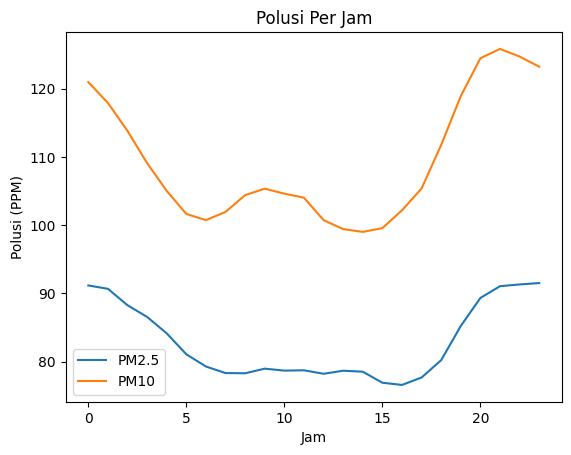

In [120]:
polusi_per_hour.plot(kind='line', x='hour', y=['PM2.5','PM10'], title='Polusi Per Jam', legend=True)
plt.xlabel('Jam')
plt.ylabel('Polusi (PPM)')
plt.show()

Dari tabel diatas, bisa disimpulkan bahwa pada jam tertentu dimana pada jam tertentu polusi PM2.5 dan PM10 meningkat, hal ini terjadi karena pabrik mulai bekerja dan tidak ingin mengganggu cuaca pada saat orang beraktivitas di luar.

## B. Hubungan Polusi per hari

In [121]:
polusi_per_day = aq_df.groupby(['day'], as_index=False).agg({'PM2.5':'mean','PM10':'mean'})

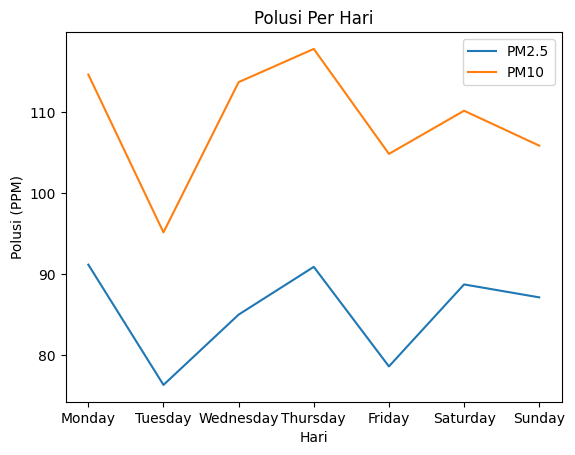

In [122]:
polusi_per_day.plot(kind='line', x='day', y=['PM2.5','PM10'], title='Polusi Per Hari', legend=True)
plt.xlabel('Hari')
plt.ylabel('Polusi (PPM)')
plt.show()

dari tabel diatas bisa disimpulkan bahwa polusi paling banyak ada di hari Kamis, Sabtu, Minggu, Senin untuk polusinya paling banyak adalah PM10 yang merupakan partikel yang berdiameter 10 Milimeter atau kurang, contoh dari asap industri, tempat pembangunan, tempat pembuangan akhir dan lainnya.

## C. Hubungan Polusi Per Bulan

In [123]:
polusi_per_bulan = aq_df.groupby(['month'], as_index=False).agg({'PM2.5':'mean','PM10':'mean'})

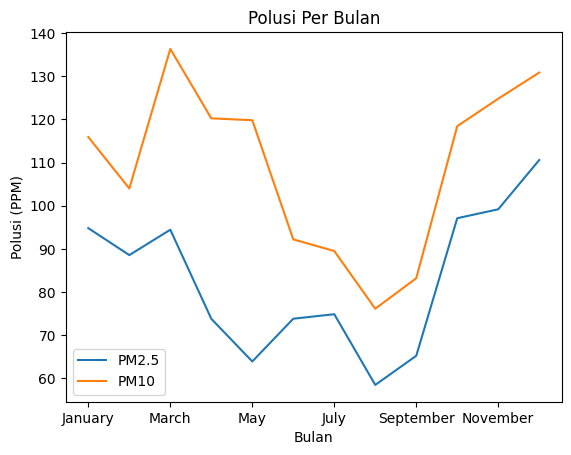

In [124]:
polusi_per_bulan.plot(kind='line', x='month', y=['PM2.5','PM10'], title='Polusi Per Bulan', legend=True)
plt.xlabel('Bulan')
plt.ylabel('Polusi (PPM)')
plt.show()

Dari Tabel diatas bisa disimpulkan bahwa Polusi PM10 paling tinggi ada di bulan maret dan PM2.5 ada di bulan December ini bisa dipengaruhi banyak faktor yang lain

## D. Hubungan Polusi dari tahun 2013 - 2017

In [125]:
polusi_per_year = aq_df.groupby(['year'], as_index=False).agg({'PM2.5':'mean','PM10':'mean'})

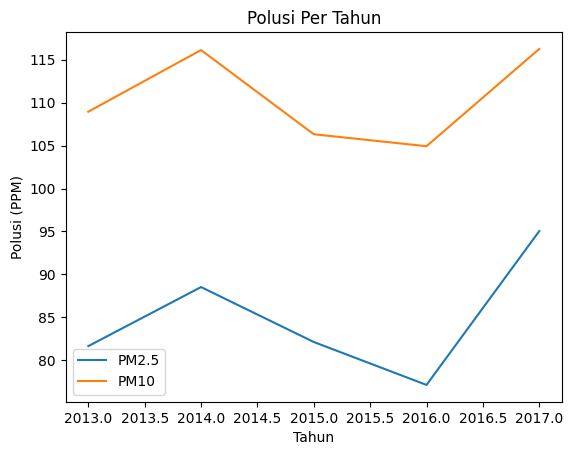

In [126]:
polusi_per_year.plot(kind='line', x='year', y=['PM2.5','PM10'], title='Polusi Per Tahun', legend=True)
plt.xlabel('Tahun')
plt.ylabel('Polusi (PPM)')
plt.show()

Dari Chart diatas bisa disimpulkan bahwa Polusi meningkat dari tahun ke tahun, seiring berkembangnya zaman dan berjalannya waktu, polusi akan meningkat dan pada tahun 2017 merupakan puncaknya dan pada waktu 2016 masih ada upaya untuk menurunkan polusi udara

# 2. Apa pengaruh Air Pressure dengan Probabilitas terjadinya Hujan


In [127]:
rain_possibility = aq_df.groupby('Pressure', as_index=False).agg({'RAIN':'max'})

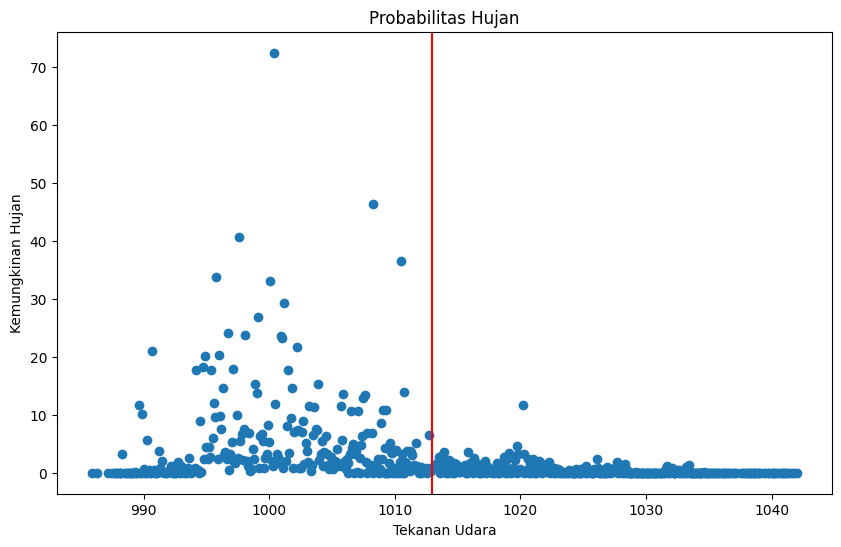

In [128]:
plt.figure(figsize=(10, 6))
plt.scatter(rain_possibility['Pressure'], rain_possibility['RAIN'])
plt.xlabel('Tekanan Udara')
plt.ylabel('Kemungkinan Hujan')
plt.title('Probabilitas Hujan')
plt.axvline(x=1013, ymin= 0, ymax=100, color='r')
plt.show()

Berdasarkan dari scatter chart diatas, probabilitas akan terjadinya sebuah hujan bisa dipengaruhi dari teknanan udara, semakin rendah tekanan udara, semakin besar probabilitasnya terjadi hujan. contoh dari tabel diatas adalah, 1013 millibar atau yang digarisi warna merah dan dibawah angka standar tekanan udara, probabilitas hujan bisa lebih tinggi.

# 3. Apa ada peningkatan dari Kandungan O3 atau Ozone?

In [129]:
ozone_content = aq_df.groupby('day', as_index=False).agg({'O3':'mean'})

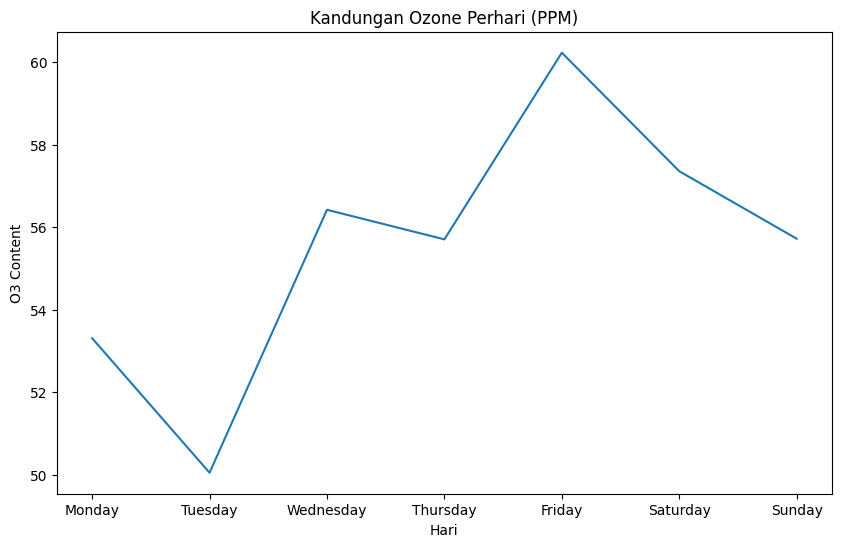

In [130]:
plt.figure(figsize=(10,6))
plt.plot(ozone_content['day'], ozone_content['O3'])
plt.xlabel('Hari')
plt.ylabel('O3 Content')
plt.title('Kandungan Ozone Perhari (PPM)')
plt.show()

Dari Line chart diatas kandungan ozone di udara paling tinggi ada di 60 PPM yang masih masuk kategori aman di index kualitas udara dan yang paling rendah ada di hari selasa di 50 PPM

In [131]:
ozone_content_per_month = aq_df.groupby('month', as_index=False).agg({'O3':'mean'})

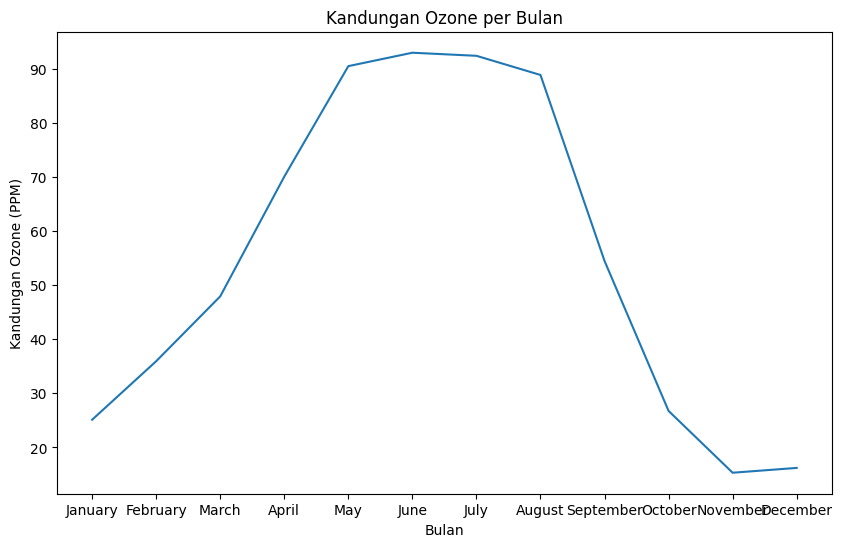

In [132]:
plt.figure(figsize=(10,6))
plt.plot(ozone_content_per_month['month'], ozone_content_per_month['O3'])
plt.title('Kandungan Ozone per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Kandungan Ozone (PPM)')
plt.show()

Dari chart diatas ada kandungan ozone yang berlebihan tetapi masih standar index aman dari mulai maret - september

In [133]:
ozone_content_per_year = aq_df.groupby('year', as_index=False).agg({'O3':'mean'})

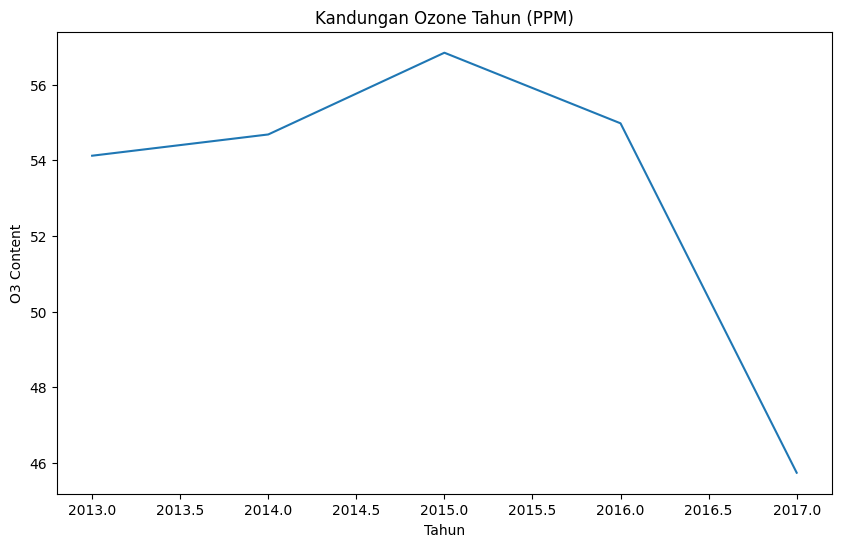

In [134]:
plt.figure(figsize=(10,6))
plt.plot(ozone_content_per_year['year'], ozone_content_per_year['O3'])
plt.xlabel('Tahun')
plt.ylabel('O3 Content')
plt.title('Kandungan Ozone Tahun (PPM)')
plt.show()

Ternyata ada penurunan Kandungan Ozone di udara, yang merupakan hal yang sangat baik. karena peningkatan ozon bisa menyebabkan penyakit kesehatan, kerusakan tanaman, Global warming, dll.

# 4. Apa faktor lain yang menyebabkan Polusi udara

Faktor lain yang menyebabkan polusi udara adalah kandungan NO2 dan SO2 di udara

In [135]:
gas_content_per_day = aq_df.groupby('day', as_index=False).agg({'SO2':'mean','NO2':'mean'})

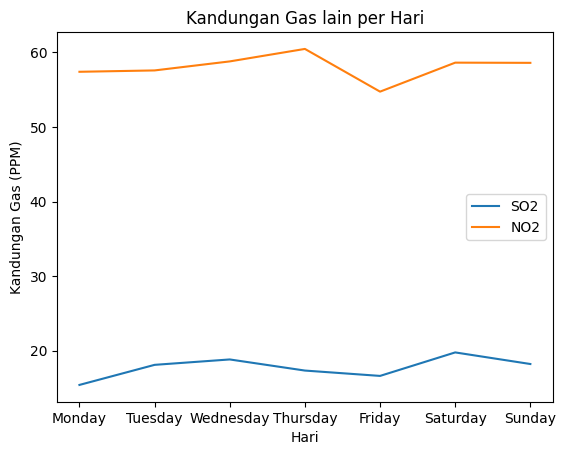

In [136]:
plt.figure()
plt.plot(gas_content_per_day['day'], gas_content_per_day['SO2'], label='SO2')
plt.plot(gas_content_per_day['day'], gas_content_per_day['NO2'], label='NO2')
plt.legend()
plt.title('Kandungan Gas lain per Hari')
plt.xlabel('Hari')
plt.ylabel('Kandungan Gas (PPM)')
plt.show()

In [137]:
gas_content_per_month = aq_df.groupby('month', as_index=False).agg({'NO2':'mean','SO2':'mean'})

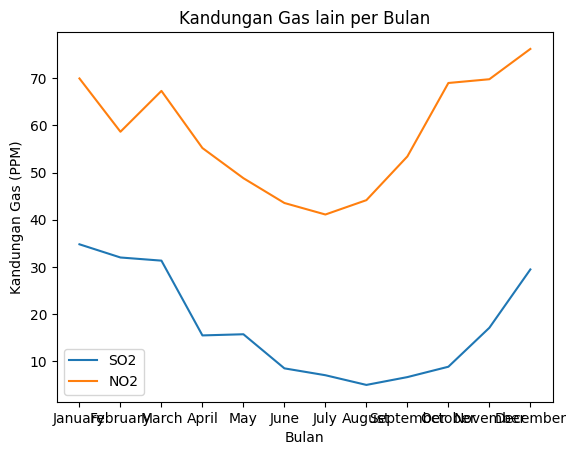

In [138]:
plt.figure()
plt.plot(gas_content_per_month['month'], gas_content_per_month['SO2'], label='SO2')
plt.plot(gas_content_per_month['month'], gas_content_per_month['NO2'], label='NO2')
plt.legend()
plt.title('Kandungan Gas lain per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Kandungan Gas (PPM)')
plt.show()

In [139]:
gas_content_per_year = aq_df.groupby('year',as_index=False).agg({'NO2':'mean','SO2':'mean'})

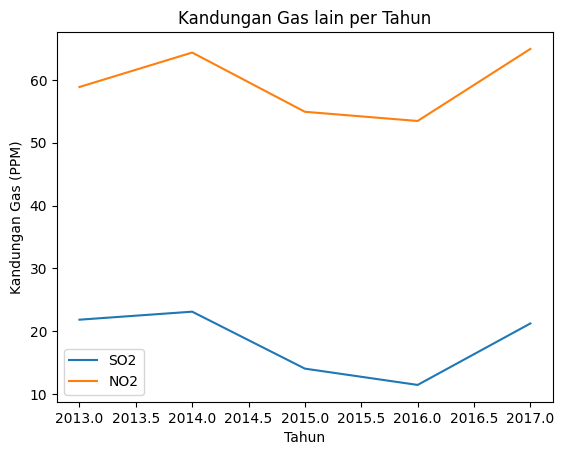

In [140]:
plt.figure()
plt.plot(gas_content_per_year['year'], gas_content_per_year['SO2'], label='SO2')
plt.plot(gas_content_per_year['year'], gas_content_per_year['NO2'], label='NO2')
plt.legend()
plt.title('Kandungan Gas lain per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Kandungan Gas (PPM)')
plt.show()

Kandungan gas lain yang mempengaruhi kualitas udara adalah SO2 dan NO2, dan untuk SO2, memang tidak begitu banyak dibandingkan dengan NO2. SO2 dan NO2 adalah polutan udara yang dihasilkan dari aktivitas manusia, membentuk prekursor partikel berbahaya dan ozon troposfer, menyebabkan polusi udara yang berbahaya bagi kesehatan manusia dan merusak lingkungan. Konsentrasi yang tinggi dari kedua gas ini di atmosfer menyebabkan iritasi pada saluran pernapasan, mengurangi jarak pandang dan mengurangi kualitas udara secara keseluruhan. Pentingnya pengendalian emisi SO2 dan NO2 dalam perlindungan kualitas udara dan kesehatan masyarakat tidak dapat ditekankan lagi.

Save Dataframe into CSV

In [141]:
aq_df.to_csv('output.csv', index=False)